In [148]:
#Librerías necesarias

import snscrape.modules.twitter as sntwitter
import pandas as pd
import os
from nltk.corpus import stopwords
from nltk.util import ngrams
import matplotlib.pyplot as plt
from wordcloud import WordCloud,ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image

In [149]:
#Directorio de trabajo
os.chdir('C:/Users/claud/Documents/')

In [150]:
#obtener tuits que contengan el hashtag #GrupoFirmeEnElZócalo


tweets_list = []
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('@ticketmaster_me since:2022-01-01 until:2022-09-24').get_items()):
    if i>=100000:
        break
    tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username])



In [151]:
#crear dataframe
tweets_df = pd.DataFrame(tweets_list, columns=['datetime', 'tweet_id', 'text', 'Username'])

In [152]:
tweets_df

,datetime,tweet_id,text,Username
0,2022-09-23 23:59:40+00:00,1573462132166909952,"@666DEMIAN @gxbrielaboss @Ticketmaster_Me Yo al momento no he tenido problemas con boletos en ningun lado, ni taquillas, ni centros, solo internet que compre de Daddy Yankee apenas y solo me dejaba elegir ticketfast, de ahí en fuera todo perfecto. 👌👌",AerometalRedSch
1,2022-09-23 23:59:26+00:00,1573462072108646406,@grozzco @Ticketmaster_Me Es en la ishop,farfallaor_
2,2022-09-23 23:59:10+00:00,1573462005796806656,@AaronFdez42 @Ticketmaster_Me Creo que ahi esta el fraude jajaja,666DEMIAN
3,2022-09-23 23:58:56+00:00,1573461947005247488,@farfallaor_ @Ticketmaster_Me es centro centro Ticketmaster el que está ahí o es un Gandhi o algo así?,grozzco
4,2022-09-23 23:58:51+00:00,1573461925421252617,"@grozzco @Ticketmaster_Me si bebecito, cobro el asesoramiento.",karenreymx
...,...,...,...,...
99995,2022-02-15 15:36:37+00:00,1493610206814744584,@alannavarro @TMetropolitanMx @Ticketmaster_Me Ya sientes la adrenalina?,alexaabaaez
99996,2022-02-15 15:36:35+00:00,1493610196001820679,@alannavarro @TMetropolitanMx @Ticketmaster_Me Me fías un boleto??,KarixOlivia
99997,2022-02-15 15:36:33+00:00,1493610187114041344,@alannavarro @TMetropolitanMx @Ticketmaster_Me cállate q me awito porque no creo poder ir :(,alanlittlesun
99998,2022-02-15 15:36:30+00:00,1493610175592292357,@alannavarro @TMetropolitanMx @Ticketmaster_Me AAAAAAAAAAAAHHHHH \nFALTA POCO PARA VERNOS,soyjessylopez


In [153]:
#Dejar solo los tuits que contengan pictogramas
tweets_df = tweets_df[tweets_df['text'].str.contains(r'[\U0001F600-\U0001F9FF]')]
tweets_df


,datetime,tweet_id,text,Username
24,2022-09-23 23:47:10+00:00,1573458984463368201,@CoronaCapital Comprar boletos con @Ticketmaster_Me 🥺 digan no a la clonacion ches putos jaja,DonPastor7
25,2022-09-23 23:46:49+00:00,1573458896601088000,"@ErnestoTell @Ticketmaster_Me Si me estresa, tanto dinero y perderme ver a las bandas 🙈 me muero 😵😭",Eli_lindura_
26,2022-09-23 23:44:30+00:00,1573458315224285184,"@valeefloresc @KevinoAmaro @DUALIPA @Ticketmaster_Me @MixupTeam @AtencionProfeco @aleeibc Justo el mismo miedo, supongo tenerlos en pdf me da un poco de confianza 😅.",evy_eve_lyn
28,2022-09-23 23:42:13+00:00,1573457741166874624,"@Ticketmaster_Me Osea que entonces los del corona los podría recoger todavía hasta el 15 de noviembre y no tendría que haber problemas, pero ya sabemos que no es así🙄",ErnestoTell
31,2022-09-23 23:40:39+00:00,1573457346142953472,@Michelle_rv604 @KevinoAmaro @Ticketmaster_Me Porque compran en reventa 🤦🏼‍♀️,Chamacade_porra
...,...,...,...,...
99986,2022-02-15 15:37:03+00:00,1493610316000808965,@alannavarro @TMetropolitanMx @Ticketmaster_Me ¿puedes convencer a mi mami de que me lleve? 😿 en verdad quiero estar presente en tu primer concierto,alanlittlesun
99987,2022-02-15 15:37:02+00:00,1493610311244472325,@alannavarro @TMetropolitanMx @Ticketmaster_Me Ando bien emocionada la vdd🥰,alanscovergirl
99991,2022-02-15 15:36:47+00:00,1493610248342544384,@alannavarro @TMetropolitanMx @Ticketmaster_Me TE VOY A VER DESPUÉS DE MUCHO TIEEEEEEEMPO 🥺👌👌💖,soygeems
99993,2022-02-15 15:36:44+00:00,1493610233821896709,@alannavarro @TMetropolitanMx @Ticketmaster_Me Solo ocupo ayuda para que me compren el M&amp;G 😫🤌🏼,strangejos


In [154]:
#Imprimir fecha máxima y mínima
print(tweets_df['datetime'].max())
print(tweets_df['datetime'].min())

2022-09-23 23:47:10+00:00
2022-02-15 15:36:39+00:00


In [155]:
#Dejar solo los emojis
tweets_df['text'] = tweets_df['text'].str.findall(r'[\U0001F600-\U0001F9FF]').str.join(' ')
tweets_df

,datetime,tweet_id,text,Username
24,2022-09-23 23:47:10+00:00,1573458984463368201,🥺,DonPastor7
25,2022-09-23 23:46:49+00:00,1573458896601088000,🙈 😵 😭,Eli_lindura_
26,2022-09-23 23:44:30+00:00,1573458315224285184,😅,evy_eve_lyn
28,2022-09-23 23:42:13+00:00,1573457741166874624,🙄,ErnestoTell
31,2022-09-23 23:40:39+00:00,1573457346142953472,🤦,Chamacade_porra
...,...,...,...,...
99986,2022-02-15 15:37:03+00:00,1493610316000808965,😿,alanlittlesun
99987,2022-02-15 15:37:02+00:00,1493610311244472325,🥰,alanscovergirl
99991,2022-02-15 15:36:47+00:00,1493610248342544384,🥺,soygeems
99993,2022-02-15 15:36:44+00:00,1493610233821896709,😫 🤌,strangejos


In [156]:
#Hacer dataframe de emojis
tweets_df = tweets_df['text'].str.get_dummies(sep=' ')
tweets_df
#Contar frecuencia de emojis y ordenar en dataframe
tweets_df = tweets_df.sum().sort_values(ascending=True, inplace=False).to_frame()
tweets_df

,0
🧿,1
🟰,1
🟣,1
🦗,1
🛼,1
...,...
🙄,642
🤬,684
🥺,986
😡,1261


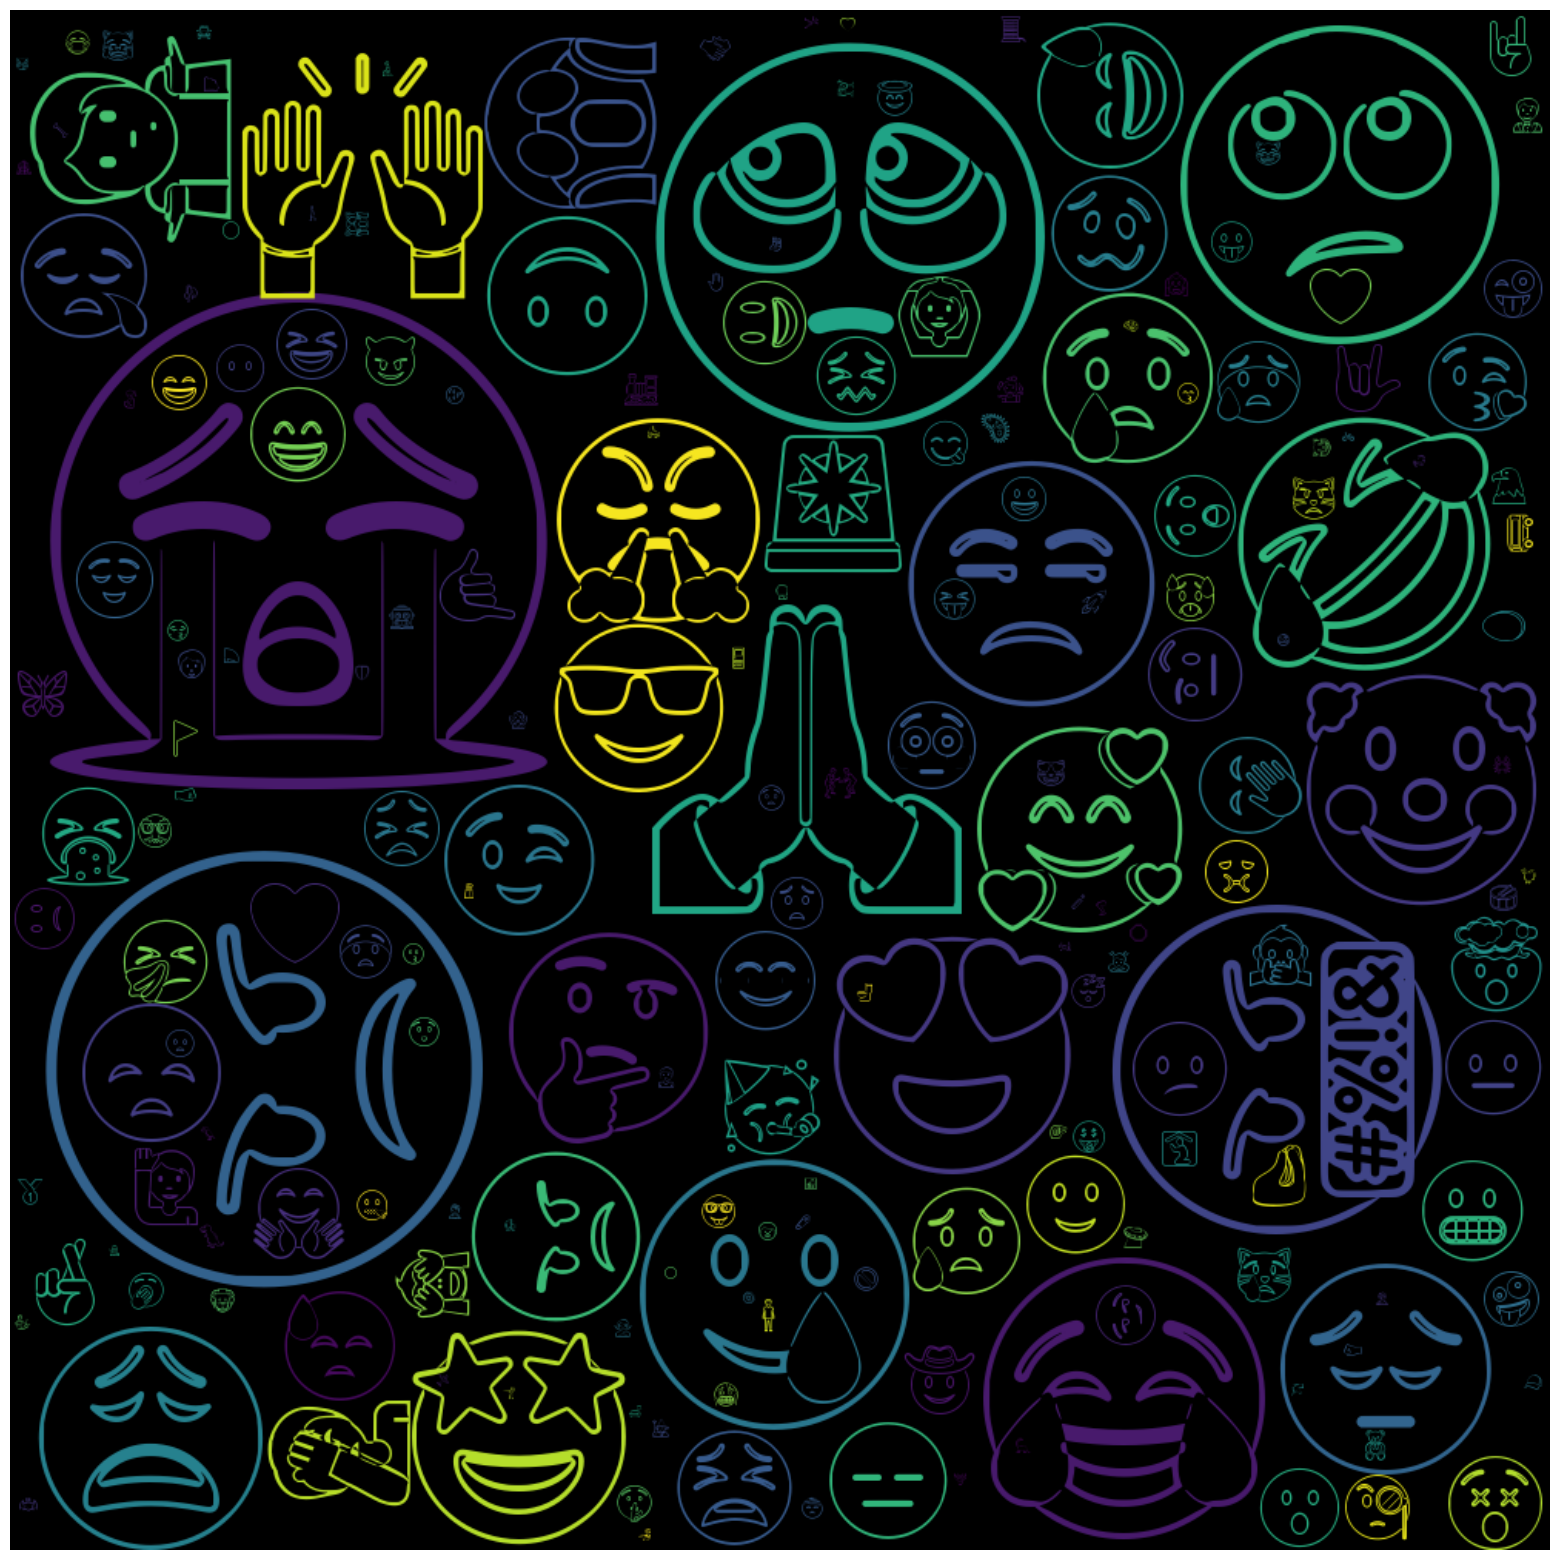

In [158]:
#Hacer wordcloud de emojis

#Fuente de emojis
font_path = 'C:/Users/claud/AppData/Local/Microsoft/Windows/Fonts/TwitterColorEmoji-SVGinOT.ttf'

#Crear wordcloud
wc = WordCloud(background_color="black", font_path=font_path, width=1000, 
 height=1000, contour_width=3, contour_color='black')
wc.generate_from_frequencies(tweets_df[0])

#Mostrar wordcloud
plt.figure(figsize=(20,20))
#plt.imshow(wc,interpolation='bilinear' )
plt.imshow(wc,interpolation='bilinear' )
plt.axis("off")
plt.savefig('ticketmaster_nubeemoji.png', bbox_inches='tight')
plt.show()
